# Mean Shift

## Reading dataset

In [1]:
from assignment_3.clustering.io import read_small_dataset
from assignment_3.clustering.model import MeanShiftClustering, split_dataset
from assignment_3.clustering.utils import plot_mean_digit

In [2]:
data = read_small_dataset().reduce_to_percentage(percentage=.1)
data

2023-02-18 17:00:11.553 | INFO     | assignment_3.clustering.io:read_small_dataset:50 - Reading datasets


[Features: 784; Length: 1050]

In [3]:
X, y = data

In [4]:
data_s_30 = data.make_pca(n_components=30)
X_s_30, y_s_30 = data_s_30

## With data

In [5]:
mean_shift = MeanShiftClustering(data=data_s_30, bw=4)

In [6]:
%%time
mean_shift.fit()

Wall time: 1.64 s


In [7]:
mean_shift.n_clusters

421

In [8]:
mean_shift.score

0.9067229561033183

## Recreate clusters

In [9]:
split = split_dataset(data=data, index=mean_shift.out)
len(split)

421

In [10]:
split = {k: v for k, v in split.items() if len(v) >= 5}
len(split)

35

C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3417: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


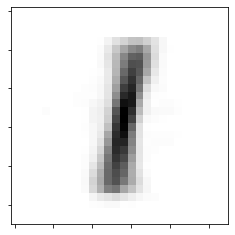

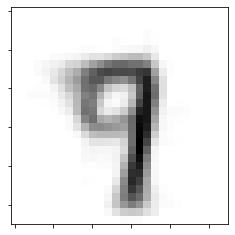

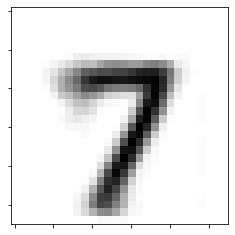

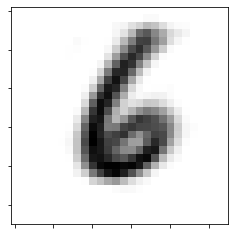

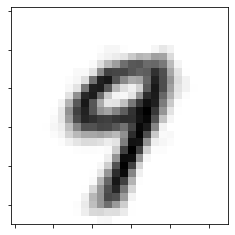

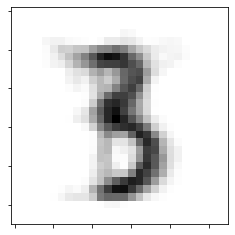

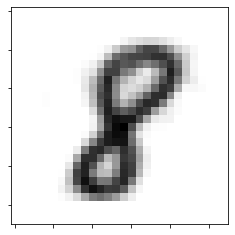

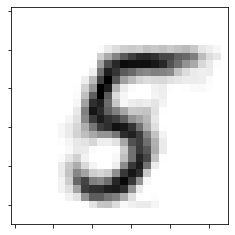

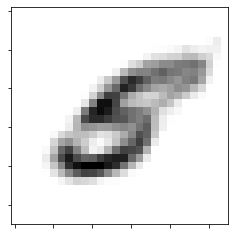

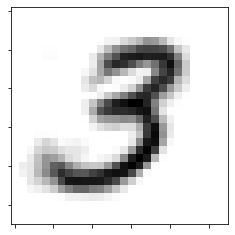

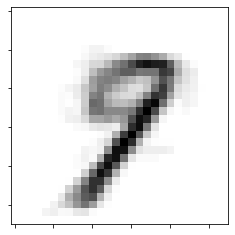

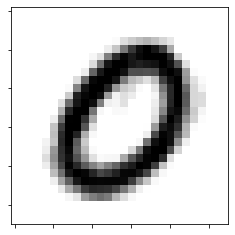

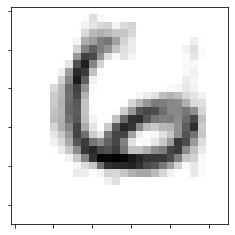

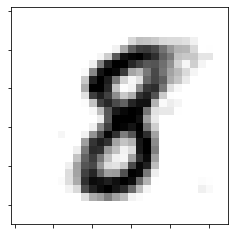

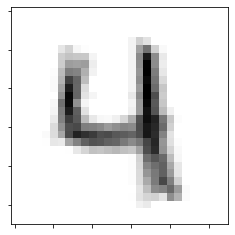

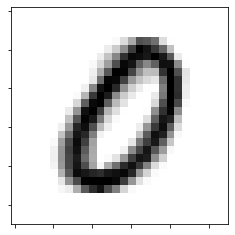

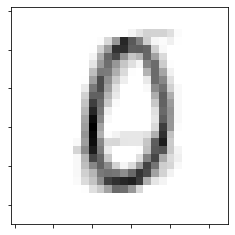

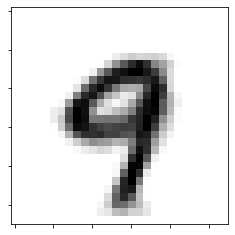

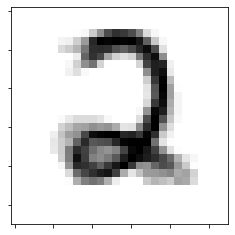

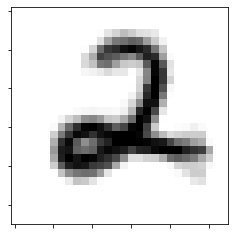

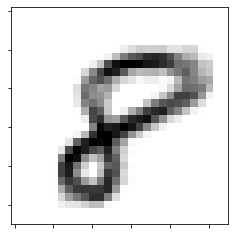

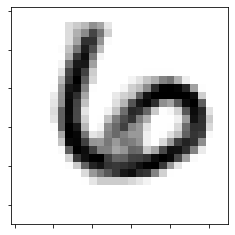

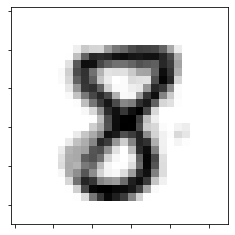

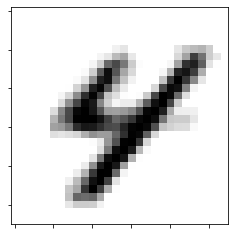

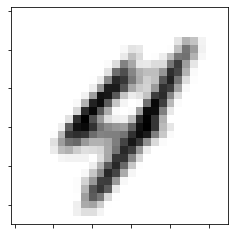

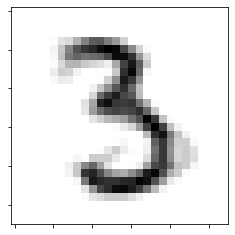

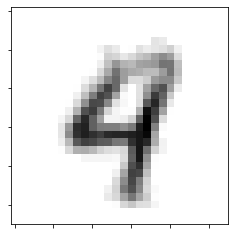

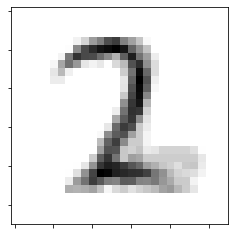

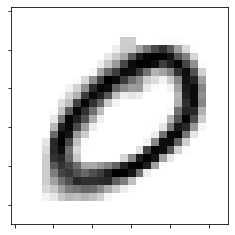

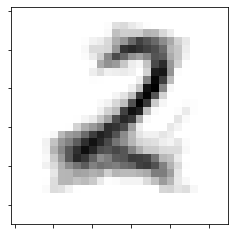

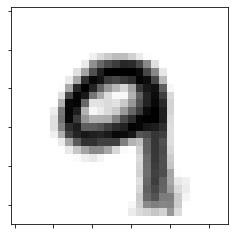

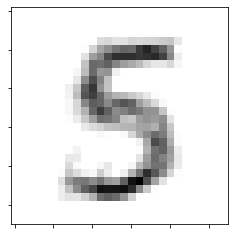

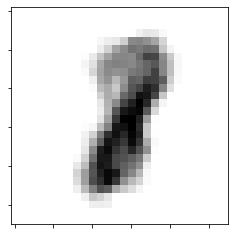

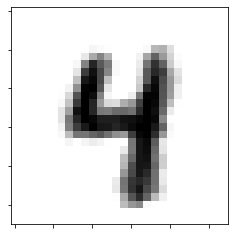

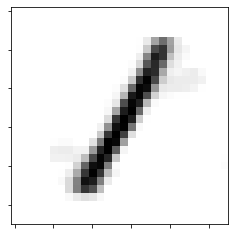

In [11]:
for s in split.values():
    plot_mean_digit(X=s.X)

## Construct iteration

In [33]:
DATA = data
BANDWITHS = [2, 4]
DIMENSIONALITY = [2, 3, 10]

best_model = None
best_score = 0

d1 = {}

for b in BANDWITHS:
    print(b)
    d2 = {}
    for d in DIMENSIONALITY:
        data_d = data.make_pca(n_components=d)
        x_d, y_d = data_d
        print(f' - {d}')
        mean_shift = MeanShiftClustering(data=data_d, bw=b)
        mean_shift.fit()
        d3 = {
            'score': mean_shift.score,
            'n_clusters': mean_shift.n_clusters
        }
        if best_model is None or mean_shift.score > best_model.score:
            best_model = mean_shift
        d2[d] = d3
    d1[b] = d2

2
 - 2
 - 3
 - 10
4
 - 2
 - 3
 - 10


In [22]:
best_model

[N-rows: 1050; N-components: 10, Score: 0.9035071950610559, N-clusters: 648]

In [23]:
d1

{2: {2: {'score': 0.5368577783830405, 'n_clusters': 2},
  4: {'score': 0.10001180262381407, 'n_clusters': 1}},
 3: {2: {'score': 0.7553261609696309, 'n_clusters': 5},
  4: {'score': 0.10001180262381407, 'n_clusters': 1}},
 10: {2: {'score': 0.9035071950610559, 'n_clusters': 648},
  4: {'score': 0.7176067910481638, 'n_clusters': 14}}}

C:\Users\user\AppData\Local\Temp/ipykernel_20268/122748763.py:17: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(x, y2, '-o', linestyle='dotted', color=color)


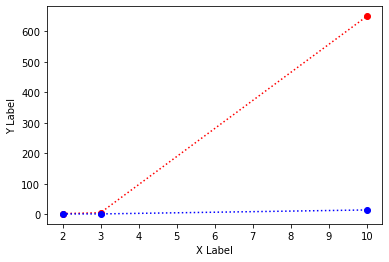

In [36]:
from matplotlib import pyplot as plt

colors = ['red', 'blue']

for bw, d2 in d1.items():
    color = colors[list(d1.keys()).index(bw)]
    x = []
    y1 = []
    y2 = []
    for nc, d3 in d2.items():
        x.append(nc)
        y1.append(d3['score'])
        y2.append(d3['n_clusters'])

    # Plot the points connected by a line
    #plt.plot(x, y1, '-o', color=color)
    plt.plot(x, y2, '-o', linestyle='dotted', color=color)

# Set the x and y axis labels
plt.xlabel('X Label')
plt.ylabel('Y Label')

# Show the plot
plt.show()